## Algorithms for Data Science - CS 676
## Project 1 -  Deliverable 3.
## Ali Inamdar

- Installing the Hugging Face upgrade package.

In [2]:
#Installing the Hugging Face update package.
! pip install --upgrade huggingface_hub

## 1. Combining the CSV (Inputs from the whole class).

In [3]:
#Importing all libraries required for the CSV conversion.
import pandas as pd
import requests
from io import StringIO


#Creating a function to pull and and combine the csv
def download_and_combine_csv(urls: list) -> pd.DataFrame:
    """
    Download CSV files from provided URLs and combine them row-wise.
    It will combine files if they have the expected column names or just the correct number of columns.
    Handles different encodings to avoid common decoding errors. Converts certain columns to integer form.

    Args:
    urls (list): List of strings containing the URLs of the CSV files.

    Returns:
    pd.DataFrame: A DataFrame containing the combined data from all matching CSV files.
    """
    expected_columns = {'user_prompt', 'url_to_check', 'func_rating', 'custom_rating'}
    combined_df = pd.DataFrame()

    for url in urls:
        try:
            # Modify the GitHub URL to point to the raw version of the file
            raw_url = url.replace('github.com', 'raw.githubusercontent.com').replace('/blob', '')

            response = requests.get(raw_url)
            if response.status_code == 200:
                try:
                    # Attempt to read with utf-8 encoding
                    content = response.content.decode('utf-8')
                except UnicodeDecodeError:
                    # Attempt to read with latin1 encoding
                    content = response.content.decode('latin1')

                # Read the CSV file into a DataFrame
                df = pd.read_csv(StringIO(content))

                # Check if the columns match the expected columns or if there are at least 4 columns
                if set(df.columns) == expected_columns:
                    combined_df = pd.concat([combined_df, df], ignore_index=True)
                elif len(df.columns) >= 4:
                    # Assume the first 4 columns are the required ones and ignore the original column names
                    df = df.iloc[:, :4]
                    df.columns = ['user_prompt', 'url_to_check', 'func_rating', 'custom_rating']
                    combined_df = pd.concat([combined_df, df], ignore_index=True)
                else:
                    print(f"Skipping file with insufficient columns: {url}")
            else:
                print(f"Failed to download from {url}")
        except Exception as e:
            print(f"Error processing {url}: {str(e)}")

    # Ensure func_rating and custom_rating are integers
    if not combined_df.empty:
        combined_df['func_rating'] = combined_df['func_rating'].round().astype(int)
        combined_df['custom_rating'] = combined_df['custom_rating'].round().astype(int)

    return combined_df

- Importing all the Github URLs for making the CSV

In [5]:
# Getting all Github URLs for combining:
urls = [
    "https://github.com/vrutika-prajapati/Credibility-Score-for-Articles/blob/main/projects/deliverable%202/Url_validation.csv",
    "https://github.com/Saikumar08-sk/URL-Validation/blob/main/Deliverable.csv",
    "https://github.com/aditya19111/Project-1-Credibility-Score-for-Articles-Sources-References/blob/main/Deliverable_2/Deliverables_rating_comparison%20-%20Sheet1.csv",
    "https://github.com/SAIKUMAR500/algorithums-for-data-science/blob/main/deliverable2/dataset(Sheet1).csv",
    "https://github.com/drashti-sanghani/Credibility_score_articles/blob/main/Project/Deliverable2/user_ratings.csv",
    "https://github.com/anchalrai101/CREDIBILITY-SCORE/blob/main/urltesting_scores.csv",
    "https://github.com/AliSInamdar/CS676-Ali-Inamdar/blob/Project_1_Credibilty_Score/Deliverable_2/Deliverable_2.csv",
    "https://github.com/bhavnaa22/Algorithms-For-Data-Science/blob/main/Deliverable%202/Deliverable2.csv",
    "https://github.com/bhatthardik4/AlgorithmDS/blob/main/Deliverable_2/HardikBhattD2.csv",
    "https://github.com/Rakeshkanche/Algorithms-for-Data-Science/blob/main/queries_urls_ratings.csv",
    "https://github.com/kristinakim-code/Credibility-Check/blob/main/deliverable2.csv",
    "https://github.com/bhavnaa22/Algorithms-For-Data-Science/blob/main/Deliverable%202/Deliverable2.csv",
    "https://github.com/kamaldomandula/Algorithms-of-data-science-Project/blob/main/Project/project1/Deliverable2/deliverable.csv",
    "https://github.com/ChinmayShetye26/Algo-for-DS-delivery2/blob/main/Sample.csv",
    "https://github.com/krishnam229/Project1/blob/main/deliverable2/sample.csv",
    "https://github.com/drona23/Deliverable2/blob/main/output.csv",
    "https://github.com/JoshuaGottlieb/Chatbot-Credibility-Scorer/blob/main/src/deliverable-02/testing/sample.csv"
]


- Converting combined csv into a dataframe.

In [6]:
#Contering the combined CSV into a dataframe.
result_df = download_and_combine_csv(urls)
print(result_df)

                                           user_prompt  \
0    I have just been on an international flight, c...   
1          What are the benefits of a vegetarian diet?   
2          What are the benefits of a vegetarian diet?   
3          What are the benefits of a vegetarian diet?   
4    How to improve mental health during stressful ...   
..                                                 ...   
297  How does altitude training affect endurance in...   
298  What are the safest travel destinations for so...   
299  How can travelers find sustainable and eco-fri...   
300  What cultural experiences should not be missed...   
301  How do budget travel options compare to luxury...   

                                          url_to_check  func_rating  \
0    https://www.mayoclinic.org/healthy-lifestyle/i...            2   
1    https://www.nhs.uk/live-well/eat-well/how-to-e...            2   
2    https://www.nhs.uk/live-well/eat-well/how-to-e...            2   
3    https://pubmed

- Printing the dataframe.

In [13]:
#Printing the dataframe.
result_df

,user_prompt,url_to_check,func_rating,custom_rating
0,"I have just been on an international flight, c...",https://www.mayoclinic.org/healthy-lifestyle/i...,2,3
1,What are the benefits of a vegetarian diet?,https://www.nhs.uk/live-well/eat-well/how-to-e...,2,4
2,What are the benefits of a vegetarian diet?,https://www.nhs.uk/live-well/eat-well/how-to-e...,2,2
3,What are the benefits of a vegetarian diet?,https://pubmed.ncbi.nlm.nih.gov/37226630/#:~:t...,2,3
4,How to improve mental health during stressful ...,https://www.who.int/news-room/questions-and-an...,3,3
...,...,...,...,...
297,How does altitude training affect endurance in...,https://sports.stackexchange.com/questions/498...,3,3
298,What are the safest travel destinations for so...,https://www.exploreworldwide.com/blog/top-solo...,3,2
299,How can travelers find sustainable and eco-fri...,https://www.peekpro.com/blog/sustainable-touri...,3,3
300,What cultural experiences should not be missed...,https://www.insidejapantours.com/blog/2015/08/...,2,4


In [14]:
#Getting information about the datatypes present in the created dataframe.
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   user_prompt    302 non-null    object
 1   url_to_check   302 non-null    object
 2   func_rating    302 non-null    int64 
 3   custom_rating  302 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 9.6+ KB


## 2. Neural Networks using Tensor Flow.

- Importing all libraries required for this deliverable.

In [15]:
#Importing all the libraries required for this deliverable.
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, Dense, Concatenate, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import pandas as pd


- Creating the Neural Network Model:

In [16]:
#Importing the Tensor Flow libraries
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Dense, Concatenate, Flatten

# Define function to create the neural network model
def create_nn_model(vocab_size: int, embedding_dim: int, max_length: int, num_of_dense: int) -> Model:
    """
    Creates a neural network model that processes user prompts using an embedding layer,
    concatenates it with function ratings, and passes through dense layers.

    Args:
        vocab_size (int): Size of the vocabulary for embedding.
        embedding_dim (int): Dimensionality of the embedding layer.
        max_length (int): Maximum length of input sequences.
        num_of_dense (int): Number of dense layers before concatenation.

    Returns:
        Model: A compiled TensorFlow model.
    """
    # Text input (user prompt)
    text_input = Input(shape=(max_length,), name="text_input")
    embedding = Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length)(text_input)
    flatten = Flatten()(embedding)

    # Dense layers for text input
    num_neurons = 2**12  # Start with 4096 neurons
    x = flatten
    for _ in range(num_of_dense):
        num_neurons = max(1, int(num_neurons / 2))  # Ensure integer neurons, minimum of 1
        x = Dense(num_neurons, activation='relu')(x)

    # Numeric input (func_rating)
    func_rating_input = Input(shape=(1,), name="func_rating_input")
    y = Dense(32, activation='relu')(func_rating_input)

    # Concatenate both paths
    concatenated = Concatenate()([x, y])
    # output = Dense(1, activation='linear', name="output")(concatenated)
    output = Dense(6, activation='softmax', name="output")(concatenated)

    # Define and compile the model
    model = Model(inputs=[text_input, func_rating_input], outputs=output)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [12]:
#Getting a list of unique values in the "custom_rating" column of our csv.
result_df["custom_rating"].unique()

array([3, 4, 2, 5, 1, 0])

In [17]:
#Printing the shape of the dataframe.
result_df.shape

(302, 4)

## 3. Tokenizer for the Neural Networks.

In [18]:
# Tokenize and prepare data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(result_df["user_prompt"])
vocab_size = len(tokenizer.word_index) + 1
max_length = max([len(x.split()) for x in result_df["user_prompt"]])
embedding_dim = 16

# Convert text data into sequences
X_text = tokenizer.texts_to_sequences(result_df["user_prompt"])
X_text = pad_sequences(X_text, maxlen=max_length, padding='post')
print(X_text.shape)

# Numeric input
X_func_rating = np.array(result_df["func_rating"]).reshape(-1, 1)
print(X_func_rating.shape)

# Target variable
y = np.array(result_df["custom_rating"]).reshape(-1, 1)
print(y.shape)

(302, 26)
(302, 1)
(302, 1)


In [19]:
#Printing the unique values again.
result_df["custom_rating"].unique()

array([3, 4, 2, 5, 1, 0])

- Converting "to_categorical" using the keras package.

In [20]:
#Converting using one hot encoding.
from keras.utils import to_categorical

# Assuming y is your array of class labels shaped as (20, 1)
# Convert labels to one-hot encoding
y_one_hot = to_categorical(y)

# Check the new shape of y_one_hot
print(y_one_hot.shape)

(302, 6)


- Creating the model.

In [23]:
# Create the model
num_of_dense_layers = 3  # Example: 2 dense layers before concatenation
model = create_nn_model(vocab_size, embedding_dim, max_length, num_of_dense_layers)

- Training the model.

In [24]:
#Training the model.
%%time

# Train the model
model.fit(
    {"text_input": X_text, "func_rating_input": X_func_rating},
    y_one_hot,
    epochs=80,
    batch_size=2,
    validation_split=0.1,
    verbose=2
)


Epoch 1/80
136/136 - 10s - 75ms/step - accuracy: 0.5424 - loss: 1.3711 - val_accuracy: 0.2581 - val_loss: 1.8397
Epoch 2/80
136/136 - 7s - 51ms/step - accuracy: 0.5793 - loss: 1.1765 - val_accuracy: 0.2581 - val_loss: 1.8809
Epoch 3/80
136/136 - 10s - 76ms/step - accuracy: 0.6605 - loss: 0.8655 - val_accuracy: 0.2903 - val_loss: 1.7194
Epoch 4/80
136/136 - 10s - 75ms/step - accuracy: 0.7712 - loss: 0.6721 - val_accuracy: 0.3226 - val_loss: 2.2333
Epoch 5/80
136/136 - 10s - 75ms/step - accuracy: 0.8118 - loss: 0.6007 - val_accuracy: 0.3226 - val_loss: 1.9675
Epoch 6/80
136/136 - 11s - 84ms/step - accuracy: 0.8413 - loss: 0.4440 - val_accuracy: 0.3871 - val_loss: 2.7928
Epoch 7/80
136/136 - 10s - 74ms/step - accuracy: 0.8413 - loss: 0.4722 - val_accuracy: 0.3548 - val_loss: 2.5878
Epoch 8/80
136/136 - 10s - 70ms/step - accuracy: 0.9041 - loss: 0.2987 - val_accuracy: 0.2903 - val_loss: 2.9168
Epoch 9/80
136/136 - 10s - 74ms/step - accuracy: 0.9188 - loss: 0.2399 - val_accuracy: 0.3548 - v

- Plotting a graph to depict the training and validation error.

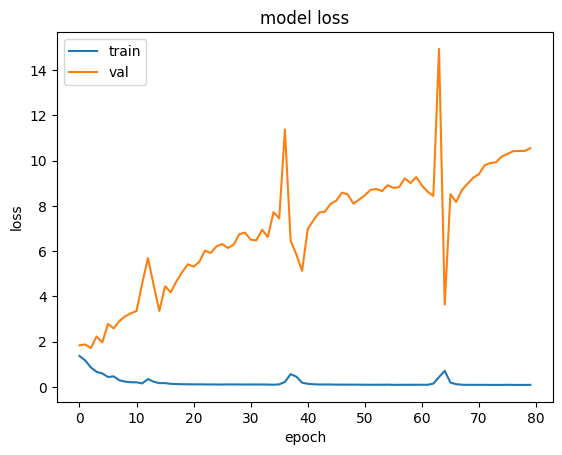

In [25]:
#Plotting a graph to depict the training and validation error.
import matplotlib.pyplot as plt

plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

- Displaying the summary of the model.

In [26]:
#Displaying the model summary
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ text_input (InputLayer)   │ (None, 26)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_2 (Embedding)   │ (None, 26, 16)         │         11,296 │ text_input[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_2 (Flatten)       │ (None, 416)            │              0 │ embedding_2[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_8 (Dense)           │ (None, 2048)           │        854,016 │ flatten_2[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_9 (Dense)           │ (None, 1024)           │      2,098,176 │ dense_8[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ func_rating_input         │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_10 (Dense)          │ (None, 512)            │        524,800 │ dense_9[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_11 (Dense)          │ (None, 32)             │             64 │ func_rating_input[0][… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_2             │ (None, 544)            │              0 │ dense_10[0][0],        │
│ (Concatenate)             │                        │                │ dense_11[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ output (Dense)            │ (None, 6)              │          3,270 │ concatenate_2[0][0]    │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 10,474,868 (39.96 MB)

 Trainable params: 3,491,622 (13.32 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,983,246 (26.64 MB)

## 4. Hugging Face

- Importing the hugging face token.

In [ ]:
#Importing the hugging face token.
from google.colab import userdata
userdata.get('Ali_hugging_face')

- Creating a Hugging face repo.

In [29]:
#Importing the hugging face token.
from google.colab import userdata
from huggingface_hub import HfApi

hf_token = userdata.get('Ali_hugging_face')

#Creating a repo on hugging face.
hf_username = "AliInamdar"  # Replace with your Hugging Face username
repo_name = "Deliverable_3"  # Change this as needed
repo_id = f"{hf_username}/{repo_name}"

api = HfApi(token=hf_token)

# Create the repository
api.create_repo(repo_id=repo_id, exist_ok=True)  # exist_ok=True prevents errors if the repo already exists

print(f"Repository created: https://huggingface.co/{repo_id}")

Repository created: https://huggingface.co/AliInamdar/Deliverable_3


## - Pushing the code/model on Hugging face.

In [31]:
#Pushing the artifacts on Hugging Face
import pickle
import os
from huggingface_hub import HfApi
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from google.colab import userdata

# Define save directory
model_dir = "./saved_model"
os.makedirs(model_dir, exist_ok=True)

# Save the model
model_path = os.path.join(model_dir, "model.keras")
model.save(model_path)

# Save the tokenizer as a pickle file
tokenizer_path = os.path.join(model_dir, "tokenizer.pkl")
with open(tokenizer_path, "wb") as f:
    pickle.dump(tokenizer, f)

# Upload model and tokenizer to Hugging Face
repo_id = f"AliInamdar/{repo_name}"  # Change as needed
hf_token = userdata.get('Ali_hugging_face')
api = HfApi(token=hf_token)

api.upload_file(path_or_fileobj=model_path, path_in_repo="model.keras", repo_id=repo_id)
api.upload_file(path_or_fileobj=tokenizer_path, path_in_repo="tokenizer.pkl", repo_id=repo_id)

print(f"Model and tokenizer successfully pushed to: https://huggingface.co/{repo_id}")

model.keras:   0%|          | 0.00/41.9M [00:00<?, ?B/s]

tokenizer.pkl:   0%|          | 0.00/25.5k [00:00<?, ?B/s]

Model and tokenizer successfully pushed to: https://huggingface.co/AliInamdar/Deliverable_3


## - Downloading the artifacts from Hugging face.

In [32]:
#Downloading the artifacts ffrom hugging face
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from huggingface_hub import hf_hub_download

# Set Keras backend to JAX (Optional, only needed if you want to experiment with JAX backend)
os.environ["KERAS_BACKEND"] = "jax"

# Define repo ID and model filename
filename = "model.keras"  # Ensure this matches what was uploaded

# Download the model
model_path = hf_hub_download(repo_id=repo_id, filename=filename)

# Load the Keras model
new_model = keras.models.load_model(model_path)

print("Model loaded successfully!")

model.keras:   0%|          | 0.00/41.9M [00:00<?, ?B/s]

Model loaded successfully!


- Displaying the summary of the new downloaded model from hugging face.

In [33]:
#Displaying the summary of the new model.
new_model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ text_input (InputLayer)   │ (None, 26)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_2 (Embedding)   │ (None, 26, 16)         │         11,296 │ text_input[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_2 (Flatten)       │ (None, 416)            │              0 │ embedding_2[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_8 (Dense)           │ (None, 2048)           │        854,016 │ flatten_2[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_9 (Dense)           │ (None, 1024)           │      2,098,176 │ dense_8[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ func_rating_input         │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_10 (Dense)          │ (None, 512)            │        524,800 │ dense_9[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_11 (Dense)          │ (None, 32)             │             64 │ func_rating_input[0][… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_2             │ (None, 544)            │              0 │ dense_10[0][0],        │
│ (Concatenate)             │                        │                │ dense_11[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ output (Dense)            │ (None, 6)              │          3,270 │ concatenate_2[0][0]    │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 10,474,868 (39.96 MB)

 Trainable params: 3,491,622 (13.32 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,983,246 (26.64 MB)

## 5. Local Inference.

- Creating a local inference of the model.

In [36]:
#Creating a local inference of out new model.
import pickle
from huggingface_hub import hf_hub_download
from tensorflow import keras
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np


# Download tokenizer
tokenizer_path = hf_hub_download(repo_id=repo_id, filename="tokenizer.pkl")

# Load the tokenizer
with open(tokenizer_path, "rb") as f:
    tokenizer = pickle.load(f)

print("Model and tokenizer loaded successfully!")

# Sample test data
test_texts = [
    "Best stock to buy?",
    "How to make safe investments?",
]

# Preprocess test data using the loaded tokenizer
max_length = model.input_shape[0][1]  # Get max_length from model input shape
X_text_test = tokenizer.texts_to_sequences(test_texts)
X_text_test = pad_sequences(X_text_test, maxlen=max_length, padding='post')

# Dummy numeric input (func_rating)
X_func_test = np.array([5, 4]).reshape(-1, 1)

# Make predictions
predictions = new_model.predict({"text_input": X_text_test, "func_rating_input": X_func_test})

# Display results
for i, text in enumerate(test_texts):
    print(f"Prompt: {text}")
    print(f"Predicted Rating: {predictions[i][0]:.2f}")
    print("-" * 50)

Model and tokenizer loaded successfully!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Prompt: Best stock to buy?
Predicted Rating: 0.00
--------------------------------------------------
Prompt: How to make safe investments?
Predicted Rating: 0.00
--------------------------------------------------
